In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
np.random.seed(11)

<h3>Preparing Data</h3>

In [5]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500

In [6]:
#Per clustering group has 500 items
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

In [11]:
X = np.concatenate((X0, X1, X2), axis=0)
K = 3
X

array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       ...,
       [ 2.56402984,  5.10138061],
       [ 3.62998852,  6.60564711],
       [ 2.31894139,  6.84856953]])

In [10]:
labels = np.asarray([0] * N + [1] * N + [2] * N).T
labels

array([0, 0, 0, ..., 2, 2, 2])

<h3>Visualize Data</h3>

In [16]:
def display(X, label):
    
    K = np.amax(label) + 1

    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

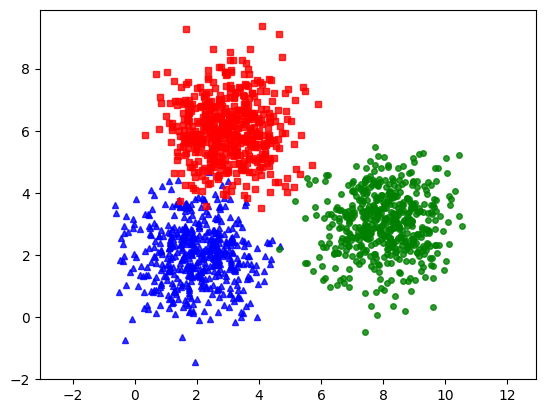

In [18]:
display(X, labels)

<h3>K-Means Clustering Algorithm</h3>

In [39]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [51]:
def kmeans_assign_labels(X, centers):
    distances = np.sum((np.array(X)[:, np.newaxis, :] - centers) ** 2, axis=2)
    return np.argmin(distances, axis=1)

In [52]:
def kmeans_update_centers(X, labels, K):
    new_centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        new_centers[k, :] = np.mean(Xk, axis=0)
    return new_centers

In [53]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [54]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [55]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

Centers found by our algorithm:
[[1.9780868  2.0065323 ]
 [8.0410628  3.02094748]
 [2.9898012  6.03271696]]


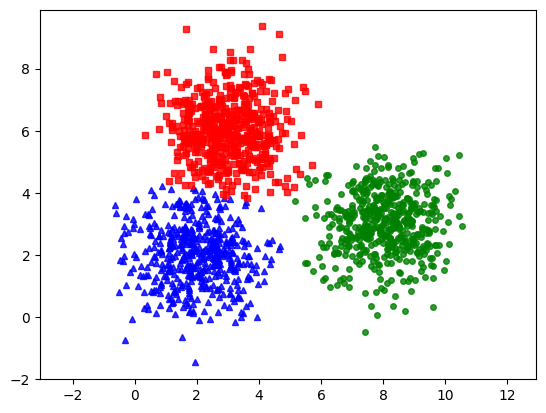

In [56]:
display(X, labels[-1])